Metadata https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#metadata

Library provides container `dcase_util.containers.MetaDataContainer` for handling meta data from most of the DCASE related application areas: acoustic scene classification, event detection, and audio tagging.

In [1]:
import dcase_util as du
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import librosa
import librosa.display as disp

Creating Container https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#creating-container

In [2]:
### Initialize meta data container with acoustic scene list:

meta_container_scenes = du.containers.MetaDataContainer(
    [
        {
            'filename': 'file1.wav',
            'scene_label': 'office'
        },
        {
            'filename': 'file2.wav',
            'scene_label': 'street'
        },
        {
            'filename': 'file3.wav',
            'scene_label': 'home'
        }
    ]
)
meta_container_scenes.show_all()

MetaDataContainer :: Class
  Items                             : 3 
  Unique
    Files                           : 3 
    Scene labels                    : 3 
    Event labels                    : 0 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav                   -        -   office            -                 -                 -       
        file2.wav                   -        -   street            -                 -                 -       
        file3.wav                   -        -   home              -                 -                 -       

  Scene statistics
        Scene label             Count   Identifiers   
        --------------------   ------   -----------   
        home                        1             0

In [3]:
### Initialize meta data container with sound event list:

meta_container_events = du.containers.MetaDataContainer(
    [
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 10.0,
            'offset': 15.0,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'footsteps',
            'onset': 23.0,
            'offset': 26.0,
        },
        {
            'filename': 'file2.wav',
            'event_label': 'speech',
            'onset': 2.0,
            'offset': 5.0,
        }
    ]
)
meta_container_events.show_all()

MetaDataContainer :: Class
  Items                             : 3 
  Unique
    Files                           : 2 
    Scene labels                    : 0 
    Event labels                    : 2 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav               10.00    15.00   -                 speech            -                 -       
        file1.wav               23.00    26.00   -                 footsteps         -                 -       
        file2.wav                2.00     5.00   -                 speech            -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   -----------   -----------   
        footsteps      

In [4]:
### Initialize meta data container with tags:

meta_container_tags = du.containers.MetaDataContainer(
    [
        {
            'filename': 'file1.wav',
            'tags': ['cat','dog']
        },
        {
            'filename': 'file2.wav',
         'tags': ['dog']
        },
        {
            'filename': 'file3.wav',
            'tags': ['dog','horse']
        }
    ]
)
meta_container_tags.show_all()

MetaDataContainer :: Class
  Items                             : 3 
  Unique
    Files                           : 3 
    Scene labels                    : 0 
    Event labels                    : 0 
    Tags                            : 3 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav                   -        -   -                 -                 cat,dog           -       
        file2.wav                   -        -   -                 -                 dog               -       
        file3.wav                   -        -   -                 -                 dog,horse         -       

  Tag statistics
        Tag                     Count   
        --------------------   ------   
        cat                         1   
        dog                         3   

Loading and saving https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#loading-and-saving

In [5]:
### Save meta data to file:

meta_container_events.save(filename='events.txt')

### Load meta data from annotation file:

meta_container_events = du.containers.MetaDataContainer().load(
    filename='events.txt'
)

Accessing data https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#accessing-data

In [6]:
### Getting audio files mentioned in the meta data and their count:

print(meta_container_events.unique_files) # ['file1.wav', 'file2.wav']
print(meta_container_events.file_count) # 2

### Getting unique scene labels and their count:

print(meta_container_scenes.unique_scene_labels) # ['home', 'office', 'street']
print(meta_container_scenes.scene_label_count) # 3

### Getting unique event labels used in the meta data and their count:

print(meta_container_events.unique_event_labels) # ['footsteps', 'speech']
print(meta_container_events.event_label_count) # 2

### Getting unique tags used in the meta data and their count:

print(meta_container_tags.unique_tags) # ['cat', 'dog', 'horse']
print(meta_container_tags.tag_count) # 3

['file1.wav', 'file2.wav']
2
['home', 'office', 'street']
3
['footsteps', 'speech']
2
['cat', 'dog', 'horse']
3


Filtering https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#filtering

In [7]:
### Filtering meta data based on filename:

filtered = meta_container_events.filter(filename='file1.wav')
filtered.show_all()

MetaDataContainer :: Class
  Items                             : 2 
  Unique
    Files                           : 1 
    Scene labels                    : 0 
    Event labels                    : 2 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav               10.00    15.00   -                 speech            -                 -       
        file1.wav               23.00    26.00   -                 footsteps         -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   -----------   -----------   
        footsteps                   1          3.00          3.00   
        speech                      1          5.00          5.00 

In [8]:
### Filtering meta data based on event label:

filtered = meta_container_events.filter(event_label='speech')
filtered.show_all()

MetaDataContainer :: Class
  Items                             : 2 
  Unique
    Files                           : 2 
    Scene labels                    : 0 
    Event labels                    : 1 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav               10.00    15.00   -                 speech            -                 -       
        file2.wav                2.00     5.00   -                 speech            -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   -----------   -----------   
        speech                      2          8.00          4.00   




In [9]:
### Filtering meta data based on file and event label:

filtered = meta_container_events.filter(filename='file1.wav', event_label='speech')
filtered.show_all()

MetaDataContainer :: Class
  Items                             : 1 
  Unique
    Files                           : 1 
    Scene labels                    : 0 
    Event labels                    : 1 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav               10.00    15.00   -                 speech            -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   -----------   -----------   
        speech                      1          5.00          5.00   




In [10]:
### Filtering based on time segment, and make segment start new zero time:

filtered = meta_container_events.filter_time_segment(filename='file1.wav', start=12, stop=24)
filtered.show_all()

MetaDataContainer :: Class
  Items                             : 2 
  Unique
    Files                           : 1 
    Scene labels                    : 0 
    Event labels                    : 2 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav                0.00     3.00   -                 speech            -                 -       
        file1.wav               11.00    12.00   -                 footsteps         -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   -----------   -----------   
        footsteps                   1          1.00          1.00   
        speech                      1          3.00          3.00 

Processing https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#processing

In [11]:
### Add time offset to the onset and offset set in the meta data items:

meta_container_events.add_time(time=20)
meta_container_events.show_all()

MetaDataContainer :: Class
  Filename                          : events.txt 
  Items                             : 3 
  Unique
    Files                           : 2 
    Scene labels                    : 0 
    Event labels                    : 2 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav               30.00    35.00   -                 speech            -                 -       
        file1.wav               43.00    46.00   -                 footsteps         -                 -       
        file2.wav               22.00    25.00   -                 speech            -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   --

In [12]:
### Remove very short events and merge events with small gap between them (same event label):

meta_container_events = du.containers.MetaDataContainer(
    [
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 1.0,
            'offset': 2.0,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 2.05,
            'offset': 2.5,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 5.1,
            'offset': 5.15,
        },
    ]
)
processed = meta_container_events.process_events(minimum_event_length=0.2, minimum_event_gap=0.1)

# Print before and after
meta_container_events.show_all()
processed.show_all()

MetaDataContainer :: Class
  Items                             : 3 
  Unique
    Files                           : 1 
    Scene labels                    : 0 
    Event labels                    : 1 
    Tags                            : 0 

  Meta data
        Source                  Onset   Offset   Scene             Event             Tags              Identifier   
        --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
        file1.wav                1.00     2.00   -                 speech            -                 -       
        file1.wav                2.05     2.50   -                 speech            -                 -       
        file1.wav                5.10     5.15   -                 speech            -                 -       

  Event statistics
        Event label             Count   Tot. Length   Avg. Length   
        --------------------   ------   -----------   -----------   
        speech         

Event Roll https://dcase-repo.github.io/dcase_util/tutorial_metadata.html#event-roll

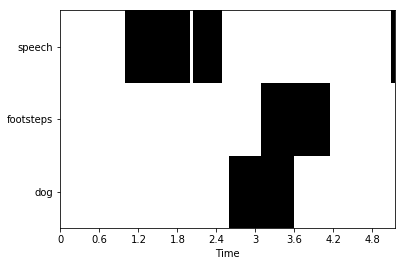

In [13]:
### Converting event list to event roll (binary matrix with event activity):

meta_container_events = du.containers.MetaDataContainer(
    [
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 1.0,
            'offset': 2.0,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 2.05,
            'offset': 2.5,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'speech',
            'onset': 5.1,
            'offset': 5.15,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'footsteps',
            'onset': 3.1,
            'offset': 4.15,
        },
        {
            'filename': 'file1.wav',
            'event_label': 'dog',
            'onset': 2.6,
            'offset': 3.6,
        },
    ]
)
event_roll = meta_container_events.to_event_roll()

# Plot
event_roll.plot()